In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
with open('hw4_data.json') as file:
    data = json.load(file)
#print(data.keys())--->dict_keys(['nodes', 'edges'])
lis_persons=[]
lis_edge = sorted(data["edges"])
for i in data["nodes"]:
    lis_persons.append(i[0])
lis_persons.sort()
#print(len(lis_persons))--->31
social_int = np.zeros((31,31))
for edge in lis_edge:
    for i in range(31):
        person1 = lis_persons[i]
        if person1 == edge[0]:
            j = lis_persons.index(edge[1])
            social_int[i][j] = edge[2]
print(social_int)#矩阵的长宽索引均为lis_person ***1-a***

[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.97  0.
   0.    6.58  0.   24.84  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.  ]
 [ 3.27  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.78  0.
   0.    2.54  0.    3.32  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    7.75  0.    7.29  0.
   0.    0.    0.    2.36  0.    0.    3.36  0.    7.06  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.  ]
 [ 4.84  2.23  0.    0.    0.    4.5   0.    0.    0.    0.    0.85  0.
   0.    3.4   0.    4.97  0.    0.    0.    3.35  0.    0.    0.    0.
   0.    0.    2.77  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.2   0.
   0.    0.    0.    0.    0.    0.    1.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.  ]
 [25.3   3.11  0.    0.    0.    0.    0.    0.    0.86

In [3]:
lis_friends = []
for i in range(31):
    temp = []
    for j in range(31):
        if social_int[i][j] != 0:
            temp.append(lis_persons[j])
    lis_friends.append(temp)
print(lis_persons)#用户对应的索引
print(lis_friends)#每个用户的直接朋友 ***1-b***

['Aarebecca', 'Maple0817', 'PureNatural', 'RackweLLizm', 'Vlad116', 'Yanyan-Wang', 'Zzzzzhuzhiwei', 'andyhuang18', 'bifenglin', 'birdflyi', 'frank-zsy', 'kunal8411', 'lhbvvvvv', 'lidongze0629', 'longyanz', 'pomelo-nwu', 'pranavshuklaa', 'stealth-bombeer', 'stevending1st', 'tyn1998', 'will-ww', 'wj23027', 'wxharry', 'xgdyp', 'xiaoya-yaya', 'yangzy0603', 'yikenie', 'yubo0923', 'yvonneyx', 'zhaosj975', 'zhicheng-ning']
[['frank-zsy', 'lidongze0629', 'pomelo-nwu'], ['Aarebecca', 'frank-zsy', 'lidongze0629', 'pomelo-nwu'], ['bifenglin', 'frank-zsy', 'pomelo-nwu', 'stevending1st', 'will-ww'], ['Aarebecca', 'Maple0817', 'Yanyan-Wang', 'frank-zsy', 'lidongze0629', 'pomelo-nwu', 'tyn1998', 'yikenie'], ['frank-zsy', 'stevending1st'], ['Aarebecca', 'Maple0817', 'bifenglin', 'frank-zsy', 'lidongze0629', 'pomelo-nwu'], ['PureNatural', 'Vlad116', 'andyhuang18', 'bifenglin', 'birdflyi', 'frank-zsy', 'lhbvvvvv', 'longyanz', 'pomelo-nwu', 'pranavshuklaa', 'stealth-bombeer', 'stevending1st', 'tyn1998', 

In [4]:
lis_degree = []
for i in range(31):
    cnt = 0
    for j in range(31):
        if social_int[i][j] != 0:
            cnt += 1
    lis_degree.append(cnt)
lis_degree_sorted = sorted(lis_degree,reverse = True)
print("考虑到度数：")
for i in range(5):
    idx = lis_degree.index(lis_degree_sorted[i])
    print("\t第 {} 名是 {} , TA有 {} 个朋友".format(i+1,lis_persons[idx],lis_degree[idx]))#***2-a***

考虑到度数：
	第 1 名是 Zzzzzhuzhiwei , TA有 20 个朋友
	第 2 名是 lhbvvvvv , TA有 18 个朋友
	第 3 名是 wj23027 , TA有 15 个朋友
	第 4 名是 yangzy0603 , TA有 14 个朋友
	第 5 名是 andyhuang18 , TA有 13 个朋友


In [5]:
lis_temp = sorted(data["nodes"])
lis_nodes = []
for i in lis_temp:
    lis_nodes.append(i[1])
print(lis_nodes)
lis_nodes_sorted = sorted(lis_nodes,reverse = True)
print("考虑到影响力：")
for i in range(5):
    idx = lis_nodes.index(lis_nodes_sorted[i])
    print("\t第 {} 名是 {} , TA的影响力为 {}".format(i+1,lis_persons[idx],lis_nodes[idx]))#***2-b***

[23.82, 1.63, 3.37, 2.28, 1.79, 50.95, 6.21, 6.27, 4.01, 3.28, 15.8, 3.36, 3.12, 3.73, 0.74, 22.36, 1.79, 2.36, 6.28, 16.64, 13.5, 3.56, 4.79, 7.58, 2.39, 3.83, 2.31, 1.12, 1.22, 1, 8.35]
考虑到影响力：
	第 1 名是 Yanyan-Wang , TA的影响力为 50.95
	第 2 名是 Aarebecca , TA的影响力为 23.82
	第 3 名是 pomelo-nwu , TA的影响力为 22.36
	第 4 名是 tyn1998 , TA的影响力为 16.64
	第 5 名是 frank-zsy , TA的影响力为 15.8


In [6]:
#以50% 50%作为加权数
lis_scores = list(np.array(lis_nodes)/2 + np.array(lis_degree)/2)
idx = lis_scores.index(max(lis_scores))
print("总的来说，第一名是 {}".format(lis_persons[idx]))# ***2-c***

总的来说，第一名是 Yanyan-Wang


In [7]:
#以有最多共同好友为推荐理由
idx_Wang = lis_persons.index("Yanyan-Wang")
lis_idx_ffriends = []
for j in range(31):
    if social_int[idx][j] != 0:
        for j2 in range(31):
            if social_int [j][j2] != 0:
                lis_idx_ffriends.append(j2)
max = 0
for ff in lis_idx_ffriends:
    lis_friends_Wang_and_ff = lis_friends[idx_Wang]+lis_friends[ff]
    lis_set_lis_friends_Wang_and_ff = list(set(lis_friends_Wang_and_ff))
    num_of_fff = len(lis_friends_Wang_and_ff) - len(lis_set_lis_friends_Wang_and_ff)
    if max < num_of_fff:
        max = num_of_fff
        friend_most = lis_persons[ff]
print("{} 最可能和 {} 做朋友 , 他们有{}个共同好友，是最多的".format("Yanyan-Wang",friend_most,max))#***3-a***

Yanyan-Wang 最可能和 Aarebecca 做朋友 , 他们有3个共同好友，是最多的


In [8]:
lis_inf_Wang = []
for f in range(31):
    lis_inf_Wang.append(social_int[idx_Wang][f])
lis_inf_Wang_sorted = sorted(lis_inf_Wang, reverse= True)
print("与Yanyan-Wang连接强度最高的5个用户为:")
for i in range(5):
    idx = lis_inf_Wang.index(lis_inf_Wang_sorted[i])
    print("\t{}".format(lis_persons[idx]))#***3-b***

与Yanyan-Wang连接强度最高的5个用户为:
	Aarebecca
	pomelo-nwu
	lidongze0629
	Maple0817
	frank-zsy


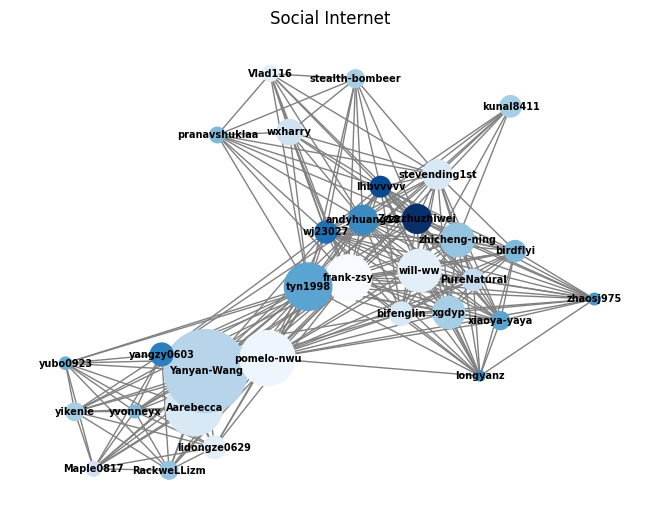

In [9]:
G = nx.from_numpy_array(social_int)
sizes_nodes = np.array(lis_nodes)*70
labels = {i: lis_persons[i] for i in range(len(lis_persons))}
nx.draw(G,with_labels = True,
        labels = labels,
        node_color = lis_degree,
        cmap = plt.cm.Blues,
        node_size=sizes_nodes,
        font_size=7,
        font_color='black',
        font_weight='bold',
        edge_color='gray')
plt.title("Social Internet")
plt.show()#***4-a***
#根据图示，颜色越深影响力越大，点越大朋友越多

In [10]:
# 可见Yanyan-Wang，Aarebecca，pomelo-nwu在社交网络中影响力较大，而Zzzzzhuzhiwei，lhbvvvvv，wj23027拥有较多真实朋友 ***4-b***